In [1]:
%%capture
!pip install -r requirements.txt

## Attributes Exploration

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.reddit_utils import get_reddit_instance, fetch_posts
from utils.file_utils import save_to_csv, read_from_csv, file_exists

In [3]:
reddit = get_reddit_instance()

print(f"Read-only mode: {reddit.read_only}")
print(f"User agent: {reddit.config.user_agent}")

Read-only mode: True
User agent: Miserable_Seaweed691


### Subreddit

In [4]:
subreddit = reddit.subreddit('movies')

print(f"Subreddit: {subreddit.display_name}")
print(f"Subscribers: {subreddit.subscribers:,}")
print(f"Is NSFW: {subreddit.over18}")

Subreddit: movies
Subscribers: 37,045,767
Is NSFW: False
Subscribers: 37,045,767
Is NSFW: False


In [5]:
hot_posts = subreddit.hot(limit=100)

search_query = "Dune"

print(f"=== SEARCH RESULTS FOR '{search_query}' in movies ===\n")

for i, submission in enumerate(subreddit.search(search_query, limit=3), 1):
    print(f"{i}. {submission.title}")
    print(f"   Score: {submission.score}, Comments: {submission.num_comments}")
    print(f"   Created: {submission.created_utc}")

=== SEARCH RESULTS FOR 'Dune' in movies ===

1. I finally watched Dune (2021) and am shocked at how bad it is
   Score: 265, Comments: 323
   Created: 1691999408.0
2. Robert Pattinson finally confirms ‘Dune: Part Three’ casting and reflects on filming the sequel in the desert
   Score: 10382, Comments: 586
   Created: 1762255424.0
3. ‘Dune: Part Three’ Wraps Filming
   Score: 6263, Comments: 731
   Created: 1762901415.0
1. I finally watched Dune (2021) and am shocked at how bad it is
   Score: 265, Comments: 323
   Created: 1691999408.0
2. Robert Pattinson finally confirms ‘Dune: Part Three’ casting and reflects on filming the sequel in the desert
   Score: 10382, Comments: 586
   Created: 1762255424.0
3. ‘Dune: Part Three’ Wraps Filming
   Score: 6263, Comments: 731
   Created: 1762901415.0


### Post details and content

In [6]:
sample_post = next(hot_posts)

print(f"Title: {sample_post.title}")
print(f"Author: {sample_post.author}")
print(f"Author flair: {sample_post.author_flair_text}")
print(f"Selftext (body): {sample_post.selftext[:50] if len(sample_post.selftext) > 50 else sample_post.selftext}")
print(f"Score: {sample_post.score}")
print(f"Upvote ratio: {sample_post.upvote_ratio}")
print(f"Number of comments: {sample_post.num_comments}")
print(f"Post flair: {sample_post.link_flair_text}")
print(f"Is stickied: {sample_post.stickied}")
print(f"Is locked: {sample_post.locked}")
print(f"Is spoiler: {sample_post.spoiler}")
print(f"Is NSFW: {sample_post.over_18}")
print(f"Permalink: https://reddit.com{sample_post.permalink}")
print(f"Post URL: {sample_post.url}")
print(f"Gilded count: {sample_post.gilded}")
print(f"Total awards: {sample_post.total_awards_received}")

Title: Hi reddit! I'm Hikari, writer, director and producer of RENTAL FAMILY, a film set in Japan starring Brendan Fraser. It's out in theaters nationwide on November 21 via Searchlight Pictures. Ask me anything!
Author: HikariAMA
Author flair: Hikari, Director of 'Rental Family'
Selftext (body): Hi reddit! I'm Hikari, I wrote, directed, and prod
Score: 1371
Upvote ratio: 0.92
Number of comments: 135
Post flair: AMA
Is stickied: True
Is locked: False
Is spoiler: False
Is NSFW: False
Permalink: https://reddit.com/r/movies/comments/1p16nd4/hi_reddit_im_hikari_writer_director_and_producer/
Post URL: https://i.redd.it/0zaylvmjl72g1.png
Gilded count: 0
Total awards: 0


### Comments

In [7]:
if len(sample_post.comments) > 0:
    first_comment = sample_post.comments[0]
    print(f"Top-level comment by {first_comment.author}:")
    print(f"Body: {first_comment.body[:100]}...")
    print(f"Direct replies: {len(first_comment.replies)}\n")

    if len(first_comment.replies) > 0:
        for i, reply in enumerate(first_comment.replies[:3], 1):
            print(f"  Reply {i} by {reply.author}: {reply.body[:80]}...")
            print(f"    Score: {reply.score}, Further replies: {len(reply.replies)}")
else:
    print("No comments available on this post.")

Top-level comment by BunyipPouch:
Body: This AMA has been verified and approved by the mods. Hikari will be back at 5 PM ET today (Wednesday...
Direct replies: 0



### Author

In [8]:
redditor = sample_post.author

print(f"Username: {redditor.name}")
print(f"User ID: {redditor.id}")
print(f"Fullname: {redditor.fullname}")
print(f"Link karma: {redditor.link_karma:,}")
print(f"Comment karma: {redditor.comment_karma:,}")
print(f"Total karma: {redditor.total_karma:,}")
print(f"Account created: {redditor.created_utc}")
print(f"Is verified: {redditor.has_verified_email}")
print(f"Is gold: {redditor.is_gold}")
print(f"Is mod: {redditor.is_mod}")
print(f"Is employee: {redditor.is_employee}")

print(f"=== Recent submissions ===")
for i, post in enumerate(redditor.submissions.new(limit=3), 1):
    print(f"{i}. {post.title} ({post.subreddit.display_name})")

print(f"\n=== Recent comments ===")
for i, comment in enumerate(redditor.comments.new(limit=3), 1):
    print(f"{i}. {comment.body[:80]}... ({comment.subreddit.display_name})")

Username: HikariAMA
User ID: 229k6tgb3v
Fullname: t2_229k6tgb3v
Link karma: 589
Comment karma: 146
Total karma: 735
Account created: 1763511740.0
Is verified: False
Is gold: False
Is mod: True
Is employee: False
=== Recent submissions ===
1. Hi reddit! I'm Hikari, writer, director and producer of RENTAL FAMILY, a film set in Japan starring Brendan Fraser. It's out in theaters nationwide on November 21 via Searchlight Pictures. Ask me anything! (movies)

=== Recent comments ===
User ID: 229k6tgb3v
Fullname: t2_229k6tgb3v
Link karma: 589
Comment karma: 146
Total karma: 735
Account created: 1763511740.0
Is verified: False
Is gold: False
Is mod: True
Is employee: False
=== Recent submissions ===
1. Hi reddit! I'm Hikari, writer, director and producer of RENTAL FAMILY, a film set in Japan starring Brendan Fraser. It's out in theaters nationwide on November 21 via Searchlight Pictures. Ask me anything! (movies)

=== Recent comments ===
1. Nausicaa of the Valley of the Wind is my favorite!  A

### Summary

#### Subreddit Attributes

| Attribute | Type | Description | Example |
|-----------|------|-------------|---------|
| display_name | str | Subreddit name without  prefix | movies |
| id | str | Unique subreddit ID | t5_2qh3s |
| title | str | Full title of the subreddit | Movie News and Discussion |
| description | str | Detailed description (sidebar) | Long sidebar text... |
| public_description | str | Short public description | News & Discussion about... |
| subscribers | int | Total number of subscribers | 31,500,000 |
| created_utc | float | Creation timestamp (Unix) | 1201242535.0 |
| over18 | bool | NSFW status | False |
| subreddit_type | str | Type: public/private/restricted | public |
| submission_type | str | Allowed submission types | any |
| allow_images | bool | Whether images are allowed | True |
| allow_videos | bool | Whether videos are allowed | True |
| allow_videogifs | bool | Whether video gifs are allowed | True |
| spoilers_enabled | bool | Spoiler tags enabled | True |
| original_content_tag_enabled | bool | OC tag enabled | False |
| wiki_enabled | bool | Wiki feature enabled | True |
| accounts_active | int | Currently active users (unreliable) | 15,000 |
| comment_score_hide_mins | int | Comment score hide duration (minutes) | 0 |
| can_assign_user_flair | bool | Users can set their flair | True |
| can_assign_link_flair | bool | Link flair can be assigned | True |
| all_original_content | bool | All content must be OC | False |
| key_color | str | Theme color key | #000000 |
| display_name_prefixed | str | Full name with  prefix | movies |
| community_icon | str | Community icon URL | https://...icon.png |
| banner_img | str | Banner image URL | https://...banner.jpg |
| header_img | str | Header image URL | https://...header.jpg |
| header_title | str | Header title text | Movies |
| quarantine | bool | Quarantine status | False |
| emojis_enabled | bool | Custom emojis enabled | True |
| advertiser_category | str | Advertising category | Entertainment |
| public_traffic | bool | Traffic stats public | False |
| language | str | Primary language | en |
| whitelist_status | str | Whitelist status | all_ads |

#### Post (Submission) Attributes

| Attribute | Type | Description |
|-----------|------|-------------|
| id | str | Unique post ID |
| title | str | Post title |
| selftext | str | Self-post text body |
| author | Redditor | Author object |
| subreddit | Subreddit | Subreddit object |
| score | int | Net upvotes (ups - downs) |
| upvote_ratio | float | Percentage upvoted |
| num_comments | int | Total comment count |
| created_utc | float | Creation timestamp |
| edited | bool/float | Edit timestamp or False |
| is_self | bool | Is text post |
| is_video | bool | Is video post |
| url | str | Post URL |
| permalink | str | Relative URL path |
| domain | str | Domain of link |
| link_flair_text | str | Post flair text |
| link_flair_css_class | str | Post flair CSS class |
| author_flair_text | str | Author flair text |
| author_flair_css_class | str | Author flair CSS |
| stickied | bool | Stickied by mod |
| locked | bool | Comments locked |
| spoiler | bool | Marked as spoiler |
| over_18 | bool | NSFW content |
| distinguished | str/None | Mod/admin distinction |
| gilded | int | Gold awards count |
| total_awards_received | int | Total awards received |
| all_awardings | list | Detailed award info |
| thumbnail | str | Thumbnail URL |
| preview | dict | Preview images dict |
| media | dict | Media metadata |
| secure_media | dict | Secure media metadata |
| is_original_content | bool | Marked as OC |
| is_reddit_media_domain | bool | Hosted on Reddit |
| is_meta | bool | Meta post flag |
| pinned | bool | Pinned to profile |
| archived | bool | Archived (6mo+) |
| hidden | bool | Hidden by user |
| saved | bool | Saved by user |
| clicked | bool | Clicked by user |
| visited | bool | Visited by user |
| num_crossposts | int | Crosspost count |
| can_mod_post | bool | Can moderate |
| fullname | str | Full Reddit ID (t3_id) |
| name | str | Same as fullname |
| post_hint | str | Type hint (image/video) |
| suggested_sort | str | Suggested sort order |
| view_count | int/None | View count |
| hide_score | bool | Score hidden |
| removed_by_category | str/None | Removal category |
| approved_by | str/None | Approved by |

#### Comment Attributes

| Attribute | Type | Description |
|-----------|------|-------------|
| id | str | Unique comment ID |
| body | str | Comment text |
| author | Redditor | Author object |
| subreddit | Subreddit | Subreddit object |
| submission | Submission | Parent submission |
| parent_id | str | Parent comment/post ID |
| score | int | Net score |
| created_utc | float | Creation timestamp |
| edited | bool/float | Edit timestamp or False |
| is_submitter | bool | Is OP of post |
| stickied | bool | Stickied by mod |
| distinguished | str/None | Mod/admin distinction |
| controversiality | int | Controversy score |
| gilded | int | Gold awards count |
| total_awards_received | int | Total awards |
| all_awardings | list | Award details |
| replies | CommentForest | Nested replies |
| depth | int | Nesting level |
| permalink | str | Full URL |
| link_id | str | Parent submission ID |
| author_flair_text | str | Author flair text |
| author_flair_css_class | str | Author flair CSS |
| collapsed | bool | Auto-collapsed |
| collapsed_reason | str/None | Collapse reason |
| score_hidden | bool | Score hidden |
| locked | bool | Locked by mod |
| saved | bool | Saved by user |
| archived | bool | Archived |
| can_mod_post | bool | Can moderate |
| fullname | str | Full ID (t1_id) |
| name | str | Same as fullname |
| body_html | str | HTML formatted body |
| removed | bool | Removed status |
| approved_by | str/None | Approved by |
| banned_by | str/None | Banned by |
| num_reports | int/None | Report count |
| mod_reports | list | Mod reports |
| user_reports | list | User reports |

#### Author Attributes

| Attribute | Type | Description |
|-----------|------|-------------|
| id | str | Unique user ID |
| name | str | Username |
| fullname | str | Full ID (t2_id) |
| created_utc | float | Account creation timestamp |
| link_karma | int | Post karma |
| comment_karma | int | Comment karma |
| total_karma | int | Combined karma |
| awardee_karma | int | Karma from receiving awards |
| awarder_karma | int | Karma from giving awards |
| has_verified_email | bool | Email verified |
| is_gold | bool | Reddit premium |
| is_mod | bool | Is moderator anywhere |
| is_employee | bool | Reddit employee |
| verified | bool | Verified account |
| has_subscribed | bool | Has subscriptions |
| hide_from_robots | bool | Hide from search engines |
| icon_img | str | Profile icon URL |
| subreddit | dict | User profile subreddit |
| accept_followers | bool | Allows followers |
| pref_show_snoovatar | bool | Shows Snoo avatar |
| is_blocked | bool | Blocked by you |
| is_friend | bool | Is your friend |
| is_suspended | bool | Account suspended |

#### Limitations

**Subreddit Level:**
- List of all subscribers (privacy protection)
- Individual user subscription lists
- Detailed traffic statistics (unless you're a moderator)
- Historical subscriber count over time
- Private subreddit content (without access)
- Detailed moderation logs (moderator only)
- Actual real-time active user count (unreliable metric)

**Post Level:**
- Individual upvoter/downvoter identities (privacy protection)
- Exact upvote and downvote counts (only ratio and net score)
- Complete edit history of posts
- Deleted content (unless cached externally)
- IP addresses or location data
- Device information used to post
- Draft versions before posting

**Comment Level:**
- Individual upvoter/downvoter identities
- Exact upvote and downvote counts
- Complete edit history
- Deleted comments (unless cached)
- Private messages or direct messages
- Read/view status by other users

**Author Level:**
- Email addresses (privacy protection)
- List of subscribed subreddits (privacy protection)
- Private messages sent/received
- Voting history (upvotes/downvotes given)
- Saved posts/comments (private)
- Hidden posts (private)
- Browsing history
- IP addresses or location data
- Real identity information
- Account password or authentication tokens
- Multi-account connections
- Blocked users list (your own only)

**Rate Limiting & Access:**
- More than 1000 posts per request (pagination required)
- Historical data beyond Reddit's retention period
- Real-time streaming of all Reddit activity
- Quarantined content (restricted access)
- Shadowbanned user content (invisible to API)
- Content from banned/suspended subreddits

#### Ideas for Social Network Analysis

**Approach 1: Interaction Networks**
- Extract posts and comments over time periods
- Map author → post, author → comment, commenter → parent_author relationships
- Build directed graphs based on reply patterns
- Weight edges by interaction frequency

**Approach 2: Co-participation Networks**
- Track which users comment on the same posts
- Identify users active in similar subreddits
- Create bipartite graphs (users ↔ posts)

**Approach 3: Temporal Analysis**
- Analyze activity patterns over time
- Track user engagement evolution
- Identify influential users by engagement metrics

**Key Identifiers for Network Analysis:**
- User ID (`redditor.id`) - unique, permanent
- Post ID (`submission.id`) - unique, permanent
- Comment ID (`comment.id`) - unique, permanent
- Subreddit ID (`subreddit.id`) - unique, permanent

### Some Statistics

#### Top Hot Posts

**The "Hot" algorithm:**
```
hot(post) = log10(max(|score|, 1)) + (sign(score) × seconds_since_epoch) / 45000
```

**Key factors:**
- **Score**: Net upvotes ```(upvotes - downvotes)```
- **Time**: When the post was created (newer posts get a boost)
- **Early voting**: The first votes have more impact than later ones

**What this means:**
- A post with 10 upvotes created 1 hour ago can rank higher than a post with 100 upvotes created 12 hours ago
- The first 10 upvotes are as valuable as the next 90 upvotes
- Posts naturally decay from "hot" over ~12-24 hours regardless of score
- Controversial posts (mixed votes) can still rank high if net score is positive

In [ ]:
subreddit = reddit.subreddit('movies')

print(f"Subscribers: {subreddit.subscribers:,}")

csv_filename = 'movies_hot_posts_1000.csv'

if file_exists(csv_filename):
    print(f"\nLoading posts from cached file: {csv_filename}")
    posts_df = read_from_csv(csv_filename)
else:
    posts_df = fetch_posts(reddit, 'movies', sort_method='hot', limit=1000)
    save_to_csv(posts_df, csv_filename)

total_comments = posts_df['num_comments'].sum()

print(f"Total posts: {len(posts_df)}")
print(f"Total comments: {total_comments:,}")
print(f"Average comments per post: {posts_df['num_comments'].mean():.1f}")
print(f"Median comments per post: {posts_df['num_comments'].median():.0f}")

print(f"\nScore Statistics:")
print(f"Average score: {posts_df['score'].mean():.1f}")
print(f"Median score: {posts_df['score'].median():.0f}")
print(f"Max score: {posts_df['score'].max():,}")
print(f"Min score: {posts_df['score'].min()}")

print(f"\nUpvote Ratio Statistics:")
print(f"Average upvote ratio: {posts_df['upvote_ratio'].mean():.2%}")
print(f"Median upvote ratio: {posts_df['upvote_ratio'].median():.2%}")

print(f"\nPost Types:")
print(f"Self posts (text): {posts_df['is_self'].sum()} ({posts_df['is_self'].sum()/len(posts_df):.1%})")
print(f"Link posts: {(~posts_df['is_self']).sum()} ({(~posts_df['is_self']).sum()/len(posts_df):.1%})")

print(f"\nSpecial Posts:")
print(f"Stickied posts: {posts_df['stickied'].sum()}")
print(f"Spoiler posts: {posts_df['spoiler'].sum()}")
print(f"NSFW posts: {posts_df['nsfw'].sum()}")

Subscribers: 37,045,767

Loading posts from cached file: movies_hot_posts_1000.csv
Total posts: 997
Total comments: 143,726
Average comments per post: 144.2
Median comments per post: 24

Score Statistics:
Average score: 574.2
Median score: 3
Max score: 42,439
Min score: 0

Upvote Ratio Statistics:
Average upvote ratio: 57.02%
Median upvote ratio: 56.00%

Post Types:
Self posts (text): 646 (64.8%)
Link posts: 351 (35.2%)

Special Posts:
Stickied posts: 2
Spoiler posts: 56
NSFW posts: 3

Loading posts from cached file: movies_hot_posts_1000.csv
Total posts: 997
Total comments: 143,726
Average comments per post: 144.2
Median comments per post: 24

Score Statistics:
Average score: 574.2
Median score: 3
Max score: 42,439
Min score: 0

Upvote Ratio Statistics:
Average upvote ratio: 57.02%
Median upvote ratio: 56.00%

Post Types:
Self posts (text): 646 (64.8%)
Link posts: 351 (35.2%)

Special Posts:
Stickied posts: 2
Spoiler posts: 56
NSFW posts: 3


#### Post Flair (Topic) Distribution

In [10]:
flair_counts = posts_df['flair'].value_counts()

print(f"Total unique flairs: {len(flair_counts)}\n")
for flair, count in flair_counts.items():
    percentage = (count / len(posts_df)) * 100
    print(f"{flair if flair else '(No Flair)'}: {count} posts ({percentage:.1f}%)")

Total unique flairs: 15

Discussion: 471 posts (47.2%)
News: 116 posts (11.6%)
Question: 105 posts (10.5%)
Media: 69 posts (6.9%)
Article: 49 posts (4.9%)
Trailer: 45 posts (4.5%)
Recommendation: 36 posts (3.6%)
Poster: 34 posts (3.4%)
Review: 20 posts (2.0%)
AMA: 10 posts (1.0%)
Announcement: 10 posts (1.0%)
Official Discussion: 8 posts (0.8%)
Spoilers: 7 posts (0.7%)
Not Confirmed: 5 posts (0.5%)
Weekly Box Office: 1 posts (0.1%)


#### Most Active Authors

In [11]:
author_counts = posts_df['author_name'].value_counts()

print("Top 10 Most Active Authors:")
for idx, (author, count) in enumerate(author_counts.head(10).items(), 1):
    total_score = posts_df[posts_df['author_name'] == author]['score'].sum()
    total_comments = posts_df[posts_df['author_name'] == author]['num_comments'].sum()
    print(f"{idx}. {author}: {count} posts | Total score: {total_score:,} | Total comments: {total_comments:,}")

Top 10 Most Active Authors:
1. MarvelsGrantMan136: 43 posts | Total score: 216,260 | Total comments: 25,309
2. BunyipPouch: 34 posts | Total score: 25,303 | Total comments: 3,070
3. NoCulture3505: 29 posts | Total score: 12,862 | Total comments: 2,020
4. ChiefLeef22: 18 posts | Total score: 79,809 | Total comments: 9,487
5. LiteraryBoner: 17 posts | Total score: 6,826 | Total comments: 16,785
6. EuphoricButterflyy: 15 posts | Total score: 4,950 | Total comments: 1,111
7. SanderSo47: 11 posts | Total score: 12,053 | Total comments: 1,221
8. TerrifierBlood: 9 posts | Total score: 210 | Total comments: 50
9. Task_Force-191: 8 posts | Total score: 3,582 | Total comments: 673
10. Past-Matter-8548: 7 posts | Total score: 4 | Total comments: 156


#### Temporal Analysis

In [12]:
# Use created_datetime from fetch_posts
posts_df['date'] = posts_df['created_datetime'].dt.date
posts_df['hour'] = posts_df['created_datetime'].dt.hour
posts_df['day_of_week'] = posts_df['created_datetime'].dt.day_name()

# Date range
print(f"Date range: {posts_df['created_datetime'].min()} to {posts_df['created_datetime'].max()}")
print(f"Time span: {(posts_df['created_datetime'].max() - posts_df['created_datetime'].min()).days} days\n")

# Posts by day
posts_by_date = posts_df.groupby('date').size()
print(f"Posts by Day:")
print(f"Average posts per day: {posts_by_date.mean():.1f}")
print(f"Max posts in a day: {posts_by_date.max()}")
print(f"Min posts in a day: {posts_by_date.min()}\n")

Date range: 2025-08-08 04:02:39 to 2025-11-20 11:30:19
Time span: 104 days

Posts by Day:
Average posts per day: 66.5
Max posts in a day: 121
Min posts in a day: 1



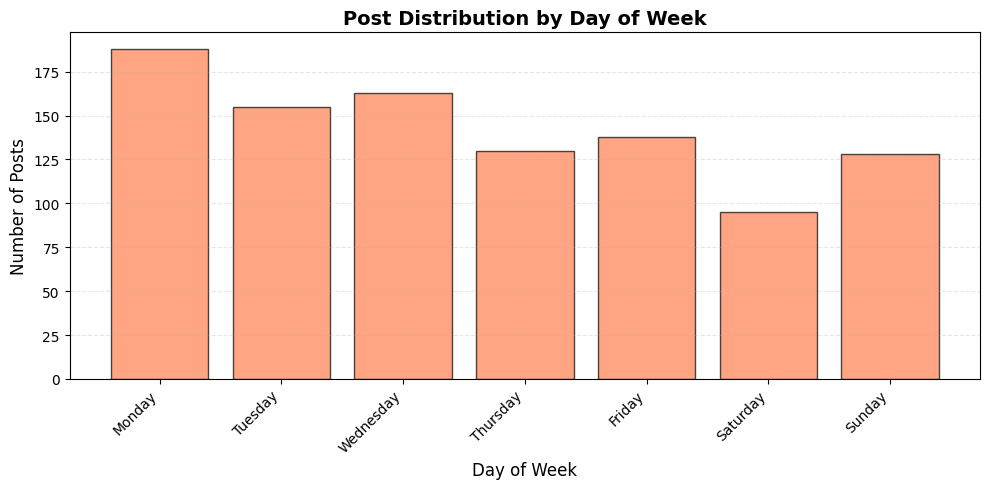

In [13]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
posts_by_dow = posts_df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
plt.bar(range(len(posts_by_dow)), posts_by_dow.values, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.title('Post Distribution by Day of Week', fontsize=14, fontweight='bold')
plt.xticks(range(len(day_order)), day_order, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

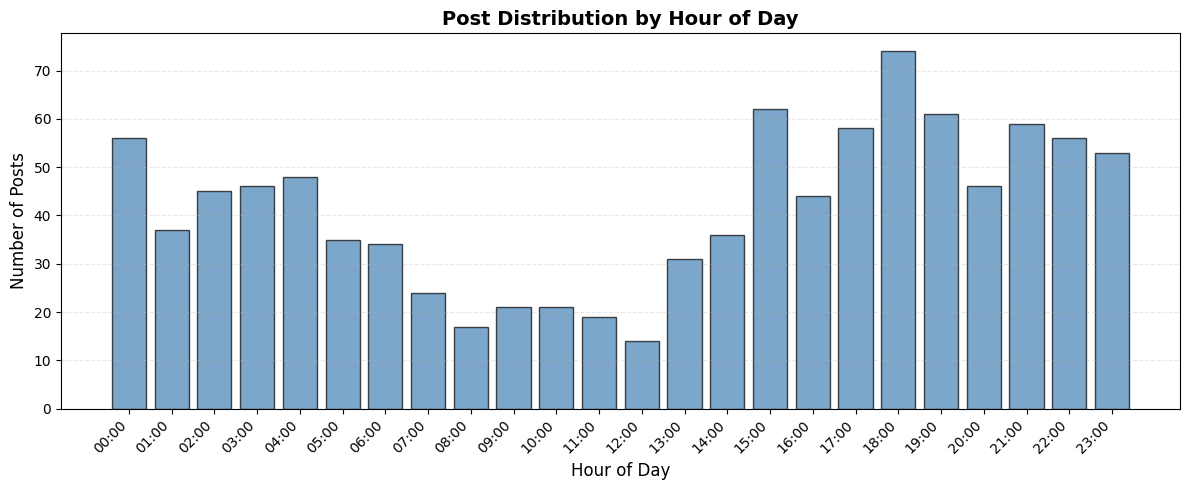

In [14]:
posts_by_hour = posts_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(posts_by_hour.index, posts_by_hour.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.title('Post Distribution by Hour of Day', fontsize=14, fontweight='bold')
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

#### Engagement Metrics Over Time

In [15]:
daily_stats = posts_df.groupby('date').agg({
    'score': ['mean', 'sum', 'max'],
    'num_comments': ['mean', 'sum', 'max'],
    'post_id': 'count'
}).round(1)

daily_stats.columns = [
    'avg_score', 'total_score', 'max_score', 
    'avg_comments', 'total_comments', 'max_comments', 'post_count'
]

print(f"Most active day:")
most_active_day = daily_stats.nlargest(1, 'post_count')
print(f"Date: {most_active_day.index[0]}")
print(f"Posts: {most_active_day['post_count'].values[0]:.0f}")
print(f"Total score: {most_active_day['total_score'].values[0]:,.0f}")
print(f"Total comments: {most_active_day['total_comments'].values[0]:,.0f}")

print(f"\nHighest engagement day (by total score):")
highest_score_day = daily_stats.nlargest(1, 'total_score')
print(f"Date: {highest_score_day.index[0]}")
print(f"Posts: {highest_score_day['post_count'].values[0]:.0f}")
print(f"Total score: {highest_score_day['total_score'].values[0]:,.0f}")

print(f"\nMost discussed day (by total comments):")
most_discussed_day = daily_stats.nlargest(1, 'total_comments')
print(f"Date: {most_discussed_day.index[0]}")
print(f"Posts: {most_discussed_day['post_count'].values[0]:.0f}")
print(f"Total comments: {most_discussed_day['total_comments'].values[0]:,.0f}")

Most active day:
Date: 2025-11-14
Posts: 121
Total score: 32,610
Total comments: 13,478

Highest engagement day (by total score):
Date: 2025-11-17
Posts: 95
Total score: 94,022

Most discussed day (by total comments):
Date: 2025-11-11
Posts: 87
Total comments: 16,250
